In [1]:
import pandas as pa
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import special, stats
#import photonstatistics as pstat 
import scipy.optimize

In [2]:
import matplotlib
matplotlib.__version__

'2.2.3'

### 20200203-h16m41s11_seeJumps_rep 1600

In [3]:
df = pa.read_hdf('data.hdf')
df

,sweeps,rabi_period,state_result,ms,ddt,n_rep_dd,ssr_reps,result_0,result_1,trace,events,thresholds,start_time,end_time,local_oscillator_freq,confocal_x,confocal_y,confocal_z
0,0,0.1,n+,-1,hahn,1,400,0.428571,NaN,"[28, 20, 21, 20, 23, 12, 30, 26, 31, 22, 25, 3...",21,[0],2020-02-03 16:42:08.266,2020-02-03 16:42:21.014,15594.995982,50.859073,46.89,13.7075
1,0,0.1,n+,-1,hahn,1,600,0.551020,NaN,"[46, 33, 35, 23, 41, 31, 48, 40, 44, 40, 35, 2...",49,[0],2020-02-03 16:42:21.822,2020-02-03 16:42:34.476,15594.995982,50.859073,46.89,13.7075
2,0,0.1,n+,-1,hahn,1,800,0.462963,NaN,"[48, 45, 45, 46, 51, 40, 46, 54, 58, 58, 51, 6...",54,[0],2020-02-03 16:43:24.653,2020-02-03 16:43:37.113,15594.917880,50.859073,46.89,13.7075
3,0,0.1,n+,-1,hahn,1,1000,0.516667,NaN,"[50, 69, 66, 70, 54, 76, 71, 61, 71, 55, 62, 5...",60,[0],2020-02-03 16:43:38.083,2020-02-03 16:43:50.465,15594.917880,50.859073,46.89,13.7075
4,0,0.1,n+,-1,hahn,1,1200,0.358209,NaN,"[61, 77, 74, 91, 78, 72, 71, 57, 78, 76, 74, 8...",67,[0],2020-02-03 16:44:45.686,2020-02-03 16:44:58.073,15594.896019,50.859073,46.89,13.7075
5,0,0.1,n+,-1,hahn,1,1400,0.375000,NaN,"[93, 62, 111, 66, 83, 60, 83, 57, 81, 64, 92, ...",64,[0],2020-02-03 16:44:59.093,2020-02-03 16:45:11.443,15594.896019,50.859073,46.89,13.7075
6,0,0.1,n+,-1,hahn,1,1600,0.564516,NaN,"[109, 60, 91, 70, 86, 50, 93, 71, 96, 56, 118,...",62,[0],2020-02-03 16:46:01.374,2020-02-03 16:46:13.726,15594.884444,50.859073,46.89,13.7075
7,0,0.1,n+,-1,hahn,1,1800,0.481481,NaN,"[116, 116, 116, 107, 122, 130, 118, 113, 116, ...",81,[0],2020-02-03 16:46:14.694,2020-02-03 16:46:27.068,15594.884444,50.859073,46.89,13.7075
8,0,0.1,+,-1,hahn,1,400,0.901961,NaN,"[22, 16, 25, 8, 21, 17, 23, 7, 20, 11, 28, 19,...",204,[0],2020-02-03 16:47:24.440,2020-02-03 16:47:40.171,15594.882214,50.859073,46.89,13.7075
9,0,0.1,+,-1,hahn,1,600,0.848341,NaN,"[38, 37, 46, 23, 35, 30, 28, 28, 43, 36, 37, 3...",211,[0],2020-02-03 16:48:29.528,2020-02-03 16:48:45.124,15594.857839,50.859073,46.89,13.7075


In [4]:
df.loc[df.state_result=='nn+'].groupby('ssr_reps').mean()

,sweeps,rabi_period,ms,n_rep_dd,result_0,result_1,events,local_oscillator_freq,confocal_x,confocal_y,confocal_z
ssr_reps,,,,,,,,,,,
400,1.5,0.1,-1.0,1.0,0.537083,NaN,22.25,15595.144402,50.859073,46.89,13.7075
600,1.5,0.1,-1.0,1.0,0.491770,NaN,32.50,15595.144402,50.859073,46.89,13.7075
800,1.5,0.1,-1.0,1.0,0.737500,NaN,193.75,15595.162585,50.859073,46.89,13.7075
1000,1.5,0.1,-1.0,1.0,0.708309,NaN,100.25,15595.162585,50.859073,46.89,13.7075
1200,1.5,0.1,-1.0,1.0,0.514844,NaN,92.00,15595.144441,50.859073,46.89,13.7075
1400,1.5,0.1,-1.0,1.0,0.706861,NaN,107.75,15595.144441,50.859073,46.89,13.7075
1600,1.5,0.1,-1.0,1.0,0.667871,NaN,93.50,15595.172149,50.859073,46.89,13.7075
1800,1.5,0.1,-1.0,1.0,0.609468,NaN,106.75,15595.172149,50.859073,46.89,13.7075


In [5]:
df.loc[df.state_result=='n+'].groupby('ssr_reps').mean()

,sweeps,rabi_period,ms,n_rep_dd,result_0,result_1,events,local_oscillator_freq,confocal_x,confocal_y,confocal_z
ssr_reps,,,,,,,,,,,
400,2,0.1,-1,1,0.615281,NaN,83.6,15595.171056,50.859073,46.89,13.7075
600,2,0.1,-1,1,0.710541,NaN,158.4,15595.171056,50.859073,46.89,13.7075
800,2,0.1,-1,1,0.646363,NaN,154.0,15595.147134,50.859073,46.89,13.7075
1000,2,0.1,-1,1,0.646078,NaN,166.0,15595.147134,50.859073,46.89,13.7075
1200,2,0.1,-1,1,0.644294,NaN,189.0,15595.104583,50.859073,46.89,13.7075
1400,2,0.1,-1,1,0.627593,NaN,183.0,15595.087143,50.859073,46.89,13.7075
1600,2,0.1,-1,1,0.682037,NaN,148.8,15595.087110,50.859073,46.89,13.7075
1800,2,0.1,-1,1,0.626684,NaN,169.8,15595.123948,50.859073,46.89,13.7075


In [9]:
df.loc[df.state_result=='n+']

,sweeps,rabi_period,state_result,ms,ddt,n_rep_dd,ssr_reps,result_0,result_1,trace,events,thresholds,start_time,end_time,local_oscillator_freq,confocal_x,confocal_y,confocal_z
0,0,0.1,n+,-1,hahn,1,400,0.428571,NaN,"[28, 20, 21, 20, 23, 12, 30, 26, 31, 22, 25, 3...",21,[0],2020-02-03 16:42:08.266,2020-02-03 16:42:21.014,15594.995982,50.859073,46.89,13.7075
1,0,0.1,n+,-1,hahn,1,600,0.551020,NaN,"[46, 33, 35, 23, 41, 31, 48, 40, 44, 40, 35, 2...",49,[0],2020-02-03 16:42:21.822,2020-02-03 16:42:34.476,15594.995982,50.859073,46.89,13.7075
2,0,0.1,n+,-1,hahn,1,800,0.462963,NaN,"[48, 45, 45, 46, 51, 40, 46, 54, 58, 58, 51, 6...",54,[0],2020-02-03 16:43:24.653,2020-02-03 16:43:37.113,15594.917880,50.859073,46.89,13.7075
3,0,0.1,n+,-1,hahn,1,1000,0.516667,NaN,"[50, 69, 66, 70, 54, 76, 71, 61, 71, 55, 62, 5...",60,[0],2020-02-03 16:43:38.083,2020-02-03 16:43:50.465,15594.917880,50.859073,46.89,13.7075
4,0,0.1,n+,-1,hahn,1,1200,0.358209,NaN,"[61, 77, 74, 91, 78, 72, 71, 57, 78, 76, 74, 8...",67,[0],2020-02-03 16:44:45.686,2020-02-03 16:44:58.073,15594.896019,50.859073,46.89,13.7075
5,0,0.1,n+,-1,hahn,1,1400,0.375000,NaN,"[93, 62, 111, 66, 83, 60, 83, 57, 81, 64, 92, ...",64,[0],2020-02-03 16:44:59.093,2020-02-03 16:45:11.443,15594.896019,50.859073,46.89,13.7075
6,0,0.1,n+,-1,hahn,1,1600,0.564516,NaN,"[109, 60, 91, 70, 86, 50, 93, 71, 96, 56, 118,...",62,[0],2020-02-03 16:46:01.374,2020-02-03 16:46:13.726,15594.884444,50.859073,46.89,13.7075
7,0,0.1,n+,-1,hahn,1,1800,0.481481,NaN,"[116, 116, 116, 107, 122, 130, 118, 113, 116, ...",81,[0],2020-02-03 16:46:14.694,2020-02-03 16:46:27.068,15594.884444,50.859073,46.89,13.7075
24,1,0.1,n+,-1,hahn,1,400,0.421053,NaN,"[33, 11, 21, 10, 21, 14, 25, 22, 19, 17, 25, 1...",19,[0],2020-02-03 17:01:41.426,2020-02-03 17:01:54.281,15594.581505,50.859073,46.89,13.7075
25,1,0.1,n+,-1,hahn,1,600,0.541667,NaN,"[41, 30, 32, 22, 34, 27, 42, 31, 36, 25, 42, 2...",24,[0],2020-02-03 17:01:55.727,2020-02-03 17:02:08.423,15594.581505,50.859073,46.89,13.7075


Text(0.5,0,'N_ssr')

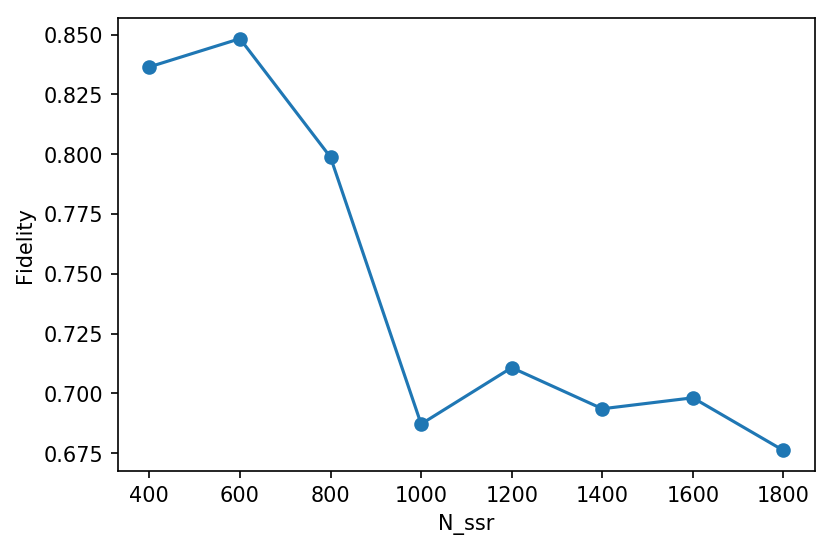

In [6]:
df = pa.read_hdf('data.hdf')
plt.figure(dpi=150)
plt.plot(df.loc[df.state_result=='+'].groupby('ssr_reps').mean().result_0, 'o-')
plt.ylabel('Fidelity')
plt.xlabel('N_ssr')

In [6]:
#average = []
#for n in df.ssr_reps.unique():
#    dfnew = df.loc[df.state_result=='n+'][['ssr_reps','trace']]
#    y = dfnew[dfnew.ssr_reps == n]
#    inde= y.index[0]
#    average.append(y.loc[inde].trace.mean())
#plt.plot(df.ssr_reps.unique(),average)

In [7]:
#average = []
#for n in df.ssr_reps.unique():
#    dfnew = df.loc[df.state_result=='nn+'][['ssr_reps','trace']]
#    y = dfnew[dfnew.ssr_reps == n]
#    inde= y.index[0]
#    average.append(y.loc[inde].trace.mean())
#plt.plot(df.ssr_reps.unique(),average)

In [8]:
#average = []
#for n in df.ssr_reps.unique():
#    dfnew = df.loc[df.state_result=='+'][['ssr_reps','trace']]
#    y = dfnew[dfnew.ssr_reps == n]
#    inde= y.index[0]
#    average.append(y.loc[inde].trace.mean())
#plt.plot(df.ssr_reps.unique(),average)

In [6]:
df = pa.read_hdf('data.hdf')
df_1=df.loc[df.state_result=='n+'].loc[df.ssr_reps==1600]
all_d = np.array([])
for i in df_1.index:
    d = np.array(df_1.trace[i])
    all_d = np.append(all_d,d)

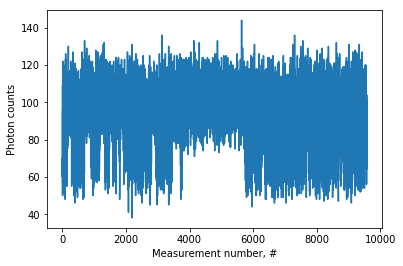

In [7]:
plt.plot(all_d)
plt.xlabel('Measurement number, #')
plt.ylabel('Photon counts')
plt.figure(dpi=150)

#plt.ylim([0.00001,1])
#plt.xlim([0,2000])

In [8]:
#df = pa.read_hdf('data.hdf')
#df_2=df.loc[df.state_result=='+'].loc[df.ssr_reps==400]
#all_d2 = np.array([])
#for i in df_2.index:
#    d2 = np.array(df_2.trace[i])
#    all_d2 = np.append(all_d2,d2)

In [9]:
#plt.plot(all_d2)
#plt.xlabel('Measurement number, #')
#plt.ylabel('Photon counts')
#plt.figure(dpi=150)

In [11]:
#df_1.trace[0]
#df_2.trace[4]
#df_3.trace[7]

(106L,)


Text(0,0.5,u'Occurence')

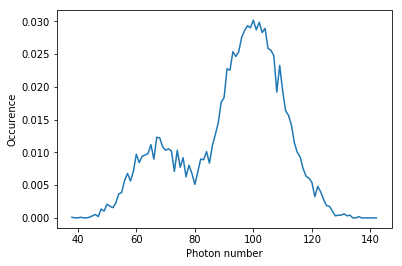

In [10]:
#plt.figure(dpi=150)

#plt.plot(df_1.trace[0], '.')
#plt.plot(df_2.trace[4], '.')
#plt.plot(df_3.trace[7], '.')

#plt.xlabel('Measurement number, #')
#plt.ylabel('Photon counts')
#plt.figure(dpi=150)

b1 = all_d
#b2 = df_2.trace[4]
#b3 = df_3.trace[7]

hist,bins = np.histogram(a=b1,bins=np.arange(b1.min(),b1.max(),1),density=True)
print(bins.shape)
plt.plot(bins[:-1],hist)

#hist,bins = np.histogram(a=b2,bins=np.arange(b2.min(),b2.max(),1))
#print(bins.shape)
#plt.plot(bins[:-1],hist)

#hist,bins = np.histogram(a=b3,bins=np.arange(b3.min(),b3.max(),1))
#print(bins.shape)
#plt.plot(bins[:-1],hist)

plt.xlabel('Photon number')
plt.ylabel('Occurence')

In [11]:
#hist,bins = np.histogram(a=a,bins=np.arange(a.min(),a.max(),1),density=True)

#plt.plot(bins[:-1],hist)
#plt.xlabel('Photon number')
#plt.ylabel('Occurence')''

In [12]:
# import numba as nb

# poisson distribution fitting definition - odd/even : odd number events of switching events

def f_odd(tau, n, tR, g0, g1, u0, u1):
    '''Part of the NV photon statistic. Function in the integral from formula S4 in shields 2015 prl spin to charge conversion paper'''
    func = g1 * np.exp((g0 - g1) * tau - g0 * tR) * special.iv(0, 2 * np.sqrt(
        g1 * g0 * tau * (tR - tau))) * stats.poisson.pmf(n, u1 * tau + u0 * (tR - tau))
    return func


def f_even(tau, n, tR, g0, g1, u0, u1):
    '''Part of the NV photon statistic. Function in the integral from formula S5 in shields 2015 prl spin to charge conversion paper'''
    func = float(np.sqrt(g1 * g0 * tau / (tR - tau)) * np.exp((g0 - g1) * tau - g0 * tR) * special.iv(1, 2 * np.sqrt(
        g1 * g0 * tau * (tR - tau))) * stats.poisson.pmf(n, u1 * tau + u0 * (tR - tau)))
    return func


def prob_photon_num(n, tR, g0, g1, u0, u1):
    """
    Part of the NV photon statistic. Integration of f_odd and f_even like
    in the formulas S4/S5 in shields 2015 prl spin to charge conversion paper'''
    :param n:
    :param tR:
    :param g0:
    :param g1:
    :param u0:
    :param u1:
    :return:
    """
    # for NV- g0,g1,u0,u1 stand for g0-,g-0,gamma0,gamma, respectively - in S4
    # for NV0 switch 0 and 1
    # tR : readout time of NV spin,
    # tau : occupying time in charge state

    p_odd, err_odd = sp.integrate.quad(f_odd, 0, tR, args=(n, tR, g0, g1, u0, u1))

    p_even, err_even = sp.integrate.quad(f_even, 0, tR, args=(n, tR, g0, g1, u0, u1))

    p_even += np.exp(-g1 * tR) * stats.poisson.pmf(n,u1 * tR)
    return p_odd + p_even


def prob_total(n, tR, g0, g1, u0, u1):
    '''NV photon statistic as seen in Luke Hacquebards "charge state dynamics" pra paper from 2018 (Formula A2)'''
    return g1 / (g0 + g1) * prob_photon_num(n, tR, g1, g0, u1, u0) + g0 / (g0 + g1) * prob_photon_num(n, tR, g0, g1, u0,
                                                                                                      u1)
def prob_single_poisson_from_prob_total(n, tR, g0, g1, u0, u1):

    return g1 / (g0 + g1)*prob_photon_num(n, tR, g1, g0, u1, u0), g0 / (g0 + g1) *prob_photon_num(n, tR, g0, g1, u0, u1)

def prob_single_poisson_from_prob_total_equal(n, tR, g0, g1, u0, u1):

    return prob_photon_num(n, tR, g1, g0, u1, u0), prob_photon_num(n, tR, g0, g1, u0, u1)

def prob_totalN(n, tR, g0, g1, u0, u1):
    '''prob_total function with the ability to process array input'''
    onebyone = np.vectorize(prob_total)

    return onebyone(n, tR, g0, g1, u0, u1)


def prob_total_ionFidelity(n, tR, g0, g1, u0, u1, FI):
    '''NV photon statistic as seen in Luke Hacquebards "charge state dynamics" pra paper from 2018 (Formula A2)'''
    return (1 - FI) * prob_photon_num(n, tR, g1, g0, u1, u0) + FI * prob_photon_num(n, tR, g0, g1, u0, u1)

def prob_single_total_ionFidelity(n, tR, g0, g1, u0, u1, FI):
    return (1 - FI) * prob_photon_num(n, tR, g1, g0, u1, u0), FI * prob_photon_num(n, tR, g0, g1, u0, u1)

def prob_single_total_ionFidelity_equal(n, tR, g0, g1, u0, u1, FI):
    return  prob_photon_num(n, tR, g1, g0, u1, u0),  prob_photon_num(n, tR, g0, g1, u0, u1)



def prob_totalN_ionFidelity(n, tR, g0, g1, u0, u1, FI):
    '''prob_total function with the ability to process array input'''
    onebyone = np.vectorize(prob_total_ionFidelity)

    return onebyone(n, tR, g0, g1, u0, u1, FI)


def prob_double_poisson(k, tR, u0, u1, FI):
    """
    Here we generate a two poisson function probability of two Poissonian distribution with mu = uo and u1 and ask for
    probability to have k.
    :param k:
    :param tR:
    :param u0:
    :param u1:
    :param FI:
    :return:
    """

    mu1 = u1 * tR
    mu0 = u0 * tR
    return FI * stats.poisson.pmf(k,mu1) + (1 - FI) * stats.poisson.pmf(k,mu0)

def prob_single_poission_from_double_result(k, tR, u0, u1, FI):
    mu1 = u1 * tR
    mu0 = u0 * tR
    return FI * stats.poisson.pmf(k,mu1), (1 - FI) * stats.poisson.pmf(k,mu0)


def prob_double_poissonN(n, tR, u0, u1, FI):
    """
    Vectorized version of prob_double_poisson
    :param n: all possible parameters.
    :param tR: integration time
    :param u0: photon level 0
    :param u1: proton level 1
    :param FI: occurence of state 1
    :return: Pmf of various n.
    """
    onebyone = np.vectorize(prob_double_poisson)
    return onebyone(n, tR, u0, u1, FI)


def fitPhotonStat(histdata_x, histdata_y, tR, g0_guess, g1_guess, u0_guess, u1_guess):
    '''fits the probability distribution to the hisogram data set'''

    def fitfunction(n, g0, g1, u0, u1):
        return prob_totalN(n, tR, g0, g1, u0, u1)

    fitmodel = fitfunction
    weights = histdata_y
    popt, pcov = sp.optimize.curve_fit(fitmodel, histdata_x, histdata_y, bounds=(0, np.inf),
                                       p0=(g0_guess, g1_guess, u0_guess, u1_guess),
                                       sigma=weights)  # former upper bounds: [20e3,60e3,40e3,600e3]
    # print(fitfunction(1,1,1,1,1))
    return popt, pcov


def fitPhotonStat_ini(histdata_x, histdata_y, tR, g0_guess, g1_guess, u0_guess, u1_guess, FI_guess):
    '''fits the probability distribution to the hisogram data set'''

    def fitfunction(n, g0, g1, u0, u1, FI):
        return prob_totalN_ionFidelity(n, tR, g0, g1, u0, u1, FI)

    fitmodel = fitfunction
    weights = histdata_y
    popt, pcov = sp.optimize.curve_fit(fitmodel, histdata_x, histdata_y, bounds=(0.0, np.inf),
                                       p0=(g0_guess, g1_guess, u0_guess, u1_guess, FI_guess),
                                       sigma=weights)  # former upper bounds: [20e3,60e3,40e3,600e3]
    # print(fitfunction(1,1,1,1,1))
    return popt, pcov


def fit_double_poisson(histdata_x, histdata_y, tR, u0_guess, u1_guess, FI_guess):
    def fitfunction(n, u0, u1, FI):
        return prob_double_poissonN(n, tR, u0, u1, FI)

    fitmodel = fitfunction
    weights = histdata_y
    popt, pcov = sp.optimize.curve_fit(fitmodel, histdata_x, histdata_y, bounds=(0, np.inf),
                                       p0=(u0_guess, u1_guess, FI_guess),
                                       sigma=weights)  # former upper bounds: [20e3,60e3,40e3,600e3]
    return popt, pcov


### Visual guess (manual) double Poission distribution 

Text(0,0.5,u'Occurence')

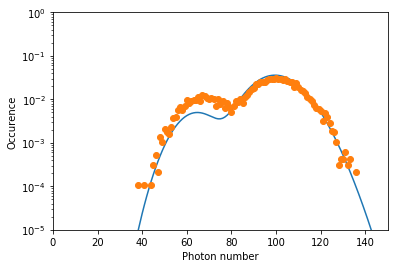

In [14]:
### Visual guess double poission distribution 

f, ax = plt.subplots()
n = np.arange(0,150,1)
tR = 0.001
FI_guess = 0.9
u0_guess = 65000
u1_guess = 100000
fittry = prob_double_poissonN(n,tR, u0_guess, u1_guess, FI_guess )
plt.plot(n, fittry,'-', label = 'Guess')
plt.plot(bins[:-1],hist,'o', label = 'data')
#plt.plot(dd[1][0:-1]*0.001,dd[0],'o', label = 'data')
plt.ylim([0.00001,1])
plt.xlim([0,150])
plt.yscale('log')
plt.xlabel('Photon number')
plt.ylabel('Occurence')



### 1st fitting - optimizing photon count rates of nuclear spin states

double poisson fit
(67442.862357722581, 99876.965138087893)


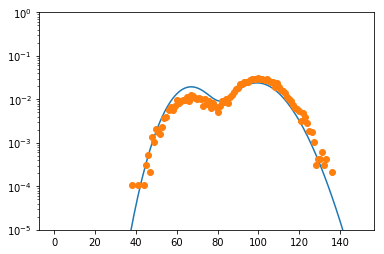

In [15]:
hist_x = bins[:-1]    # how can I handle scaling ? 
hist_y = hist
## Fit by double poisson distribution 

print ('double poisson fit')
#    para0,paracov0=pstat.fit_double_poisson(hist_x[hist_y!=0],hist_y[hist_y!=0],tr,average_count/(9*FI_guess+1),10*average_count/(9*FI_guess+1),FI_guess)
para0,paracov0= fit_double_poisson(hist_x[hist_y!=0],hist_y[hist_y!=0],tR, u0_guess,
                                   u1_guess,FI_guess)

u0_result=para0[0] 
u1_result=para0[1]
FI_result=para0[2] #*para0[1]/para0[0]

fitresult = prob_double_poissonN(n,tR, u0_result, u1_result, FI_result )




### Visual guess for integration
u=[]
tR =0.001 # seconds
tR_g = 0.001
ratio = 1.5
level = 10.0
g0 = ratio*level # Hz
g1 = level # Hz
u0 = u0_result*1.0
u1 = u1_result*1.0

print(u0, u1)
histdata_x = np.arange(0,150,1)
for n in histdata_x:
    ud=prob_total(n,tR_g,g0,g1,u0,u1)
    u.append(ud)
plt.plot(histdata_x,u,'-',label = 'fit_guess')
plt.plot(bins[:-1],hist,'o', label = 'data')
#plt.plot(dd[1][:-1]*tR,dd[0],'o', label = 'data')
plt.yscale('log')
plt.ylim([0.00001,1])
plt.show()

### 2nd fitting - optimizing switching, photon count rates of nuclear spin states 

[  1.19963803e-04   3.51049687e-05   6.74428703e+04   9.98769708e+04]


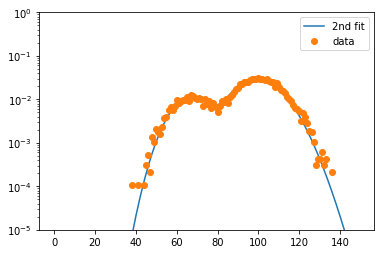

In [16]:
para0 = [g0,g1,u0,u1]
para, paracov = fitPhotonStat(hist_x[hist_y!=0],hist_y[hist_y!=0],tR, para0[0],para0[1],para0[2],para0[3])
print (para)

g0,g1,u0,u1 = para
u = []
u2 = []
u3 = []
u4 = []
u5 = []
u6 = []


for n in histdata_x:   
    ud=prob_total(n,tR,g1,g0,u1,u0)
    u.append(ud)

plt.plot(histdata_x,u,'-',label='2nd fit')
plt.plot(bins[:-1],hist,'o', label = 'data')
plt.legend()
plt.yscale('log')
plt.ylim([0.00001,1])

#poisson1_, poisson2_  = prob_single_poisson_from_prob_total(n, tR, g0, g1, u0_result, u1_result)

plt.show()
plt.figure();

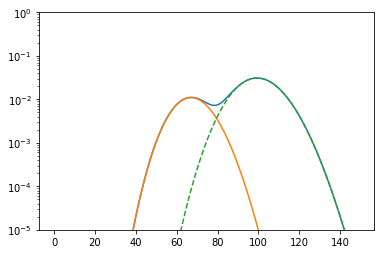

In [17]:
# split double poisson to two single poisson distribution 

histdata_x_1 = np.arange(0,150,1)
for n in histdata_x_1:   
    udd = poisson1_, poisson2_  = prob_single_poisson_from_prob_total(n, tR, g0, g1, u0_result, u1_result)
    u2.append(udd[0])
    u3.append(udd[1])
    
    
plt.plot(histdata_x,u,'-',label='2nd fit')
plt.plot(histdata_x_1,u2,'-')
plt.plot(histdata_x_1,u3,'--')


plt.ylim([0.00001,1])
plt.yscale('log')
plt.show();


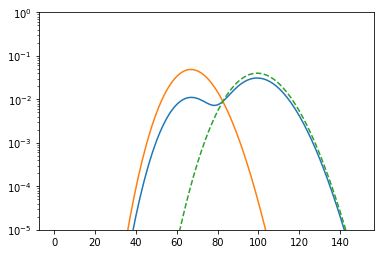

In [18]:
# Renomalize each poisson distribution 

histdata_x_1 = np.arange(0,150,1)
for n in histdata_x_1:   
    udd=poisson1_, poisson2_  = prob_single_poisson_from_prob_total_equal(n, tR, g0, g1, u0_result, u1_result)
    u4.append(udd[0])
    u5.append(udd[1])
    
plt.plot(histdata_x,u,'-',label='2nd fit')
plt.plot(histdata_x_1,u4,'-')
plt.plot(histdata_x_1,u5,'--')


plt.ylim([0.00001,1])
plt.yscale('log')
plt.show();



### Fidelity: readout of nuclear spin state "n+" 

(0.96331649767397531, 0.96213264110810515)
('Fidelity_nuclear spin state readout', 0.96272456939104023)


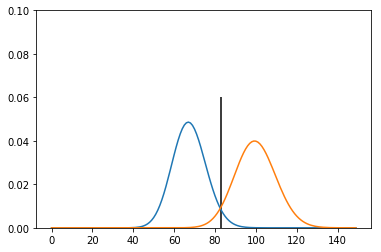

In [23]:
# Let's optimize readout fidelity 


plt.plot(u4)
plt.plot(u5)
nth=83
plt.vlines(x=nth, ymax=0.06, ymin=0)
result1=sum([u4[ii] for ii in range(0, nth)])
result2=sum([u5[ii] for ii in range(nth, 150)])
print(result1,result2)
Fc0=result1
Fc1=result2
plt.ylim([0.00001,0.1])


print('Fidelity_nuclear spin state readout',(Fc0+Fc1)/2.0)

In [29]:
def Fidelity(x, nth,tR):
    
    histdata_x_1 = np.arange(0,200,1)
    u4 = []
    u5 = []
    for n in histdata_x_1:   
        udd=poisson1_, poisson2_  = prob_single_poisson_from_prob_total_equal(n, tR, g0, g1, u0_result, u1_result)
        u4.append(udd[0])
        u5.append(udd[1])
    f0=sum([u4[ii] for ii in range(0, nth)])
    f1=sum([u5[ii] for ii in range(nth, 100)])
    
    return -(f0+f1)/2.0

 Fidelity 


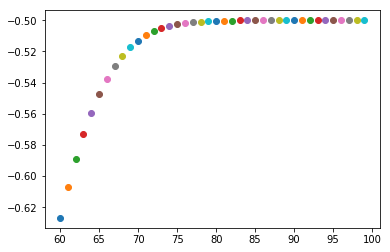

In [30]:
print (" Fidelity ")
for nth in range(60,100):
    plt.plot(nth,Fidelity(n,nth,0.001),"o")